**DIFERENCIACION NUMERICA**

El siguiente programa escrito en Python incluye la fórmula para estimar la primera derivada de f(x) = x ex para x = 1 con valores de h = 0.1, 0.01, 0.001, 0.0001, ..., y su comparación con el valor exacto f’(1) = 5.436563656918091…

In [8]:
#Comportamiento del error en diferenciación numérica 
from math import*
def f(x):return x*exp(x) 
r=5.436563656918091
h=0.1
for i in range(15):
    d=(f(1+h)-f(1))/h 
    e=abs(r-d)
    print('%18.15f %18.15f %18.15f %18.15f'%(h,r,d,e))
    h=h/10

 0.100000000000000  5.436563656918091  5.863007978820320  0.426444321902229
 0.010000000000000  5.436563656918091  5.477519670804032  0.040956013885941
 0.001000000000000  5.436563656918091  5.440642892414527  0.004079235496436
 0.000100000000000  5.436563656918091  5.436971417318581  0.000407760400490
 0.000010000000000  5.436563656918091  5.436604431396929  0.000040774478838
 0.000001000000000  5.436563656918091  5.436567733774210  0.000004076856119
 0.000000100000000  5.436563656918091  5.436564070038229  0.000000413120138
 0.000000010000000  5.436563656918091  5.436563643712588  0.000000013205503
 0.000000001000000  5.436563656918091  5.436564087801797  0.000000430883706
 0.000000000100000  5.436563656918091  5.436566752337056  0.000003095418965
 0.000000000010000  5.436563656918091  5.436584515905450  0.000020858987359
 0.000000000001000  5.436563656918091  5.437428285404166  0.000864628486075
 0.000000000000100  5.436563656918091  5.435651928564766  0.000911728353326
 0.000000000

Se observa que la precisión mejora cuando se reduce h, pero a partir de cierto valor de h el resultado pierde precisión.

La aproximación propuesta para f’i es una fórmula de primer orden cuyo error de truncamiento es E=O(h). Por lo tanto, si se desea una aproximación con alta precisión, se debe elegir para h un valor muy pequeño, pero ya hemos mencionado que esto puede hacer que el error de redondeo sea significativo.

Adicionalmente, si únicamente se tienen puntos de f, no se puede elegir h. Entonces es preferible usar fórmulas con mayor precisión usando los puntos dados.

   MÉTODOS NUMÉRICOS PARA RESOLVER ECUACIONES DIFERENCIALES ORDINARIAS
   
 Método de la serie de Taylor 

In [0]:
import numpy as np
def taylor3(f,df,x,y,h,m):
    u=[]
    v=[]
    
    for i in range(m):
        y=y+h*f(x,y)+h**2/2*df(x,y)
        u=u+[x]
        v=v+[y]
    return [u,v]

Ejemplo. Con la función taylor3, obtenga 5 puntos de la solución de la siguiente ecuación diferencial. Tabule y grafique los puntos. Use h = 0.1

$y’ - y - x + x^2 - 1 = 0, y(0) = 1$

In [53]:
def f(x,y):return y-x**2+x+1
def df(x,y):return y-x**2-x+2
[u,v]=taylor3(f,df,0,1,0.1,5)
print(u)
#[0.1, 0.2, 0.3, 0.4, 0.5]
print(v)
#[1.2149, 1.4610, 1.7392, 2.0509, 2.3974]


[0, 0, 0, 0, 0]
[1.2149999999999999, 1.452575, 1.715095375, 2.005180389375, 2.325724330259375]


Solución numérica con el método odeint de la librería Scipy de Python.


In [55]:
from numpy import*
from scipy.integrate import odeint
def f(y,x):return y-x**2+x+1	#Note el orden de x, y
x=arange(0,0.6,0.1)	#Dominio de y(x). Incluye x0
y=odeint(f,1,x)	#Integrar. Se incluye y(x0)
print(x)
#[ 0. ,	0.1,	0.2,	0.3,	0.4,	0.5]
print(y) #[[ 1.	], [ 1.21517091],[ 1.46140275],[ 1.73985882],[ 2.05182469],[ 2.39872127]]

[0.  0.1 0.2 0.3 0.4 0.5]
[[1.        ]
 [1.21517091]
 [1.46140275]
 [1.73985882]
 [2.05182469]
 [2.39872127]]


Solución analítica con el método dsolve de la librería simbólica Sympy de Python

Resolver la ecuación diferencial:

$y’ - y - x + x^2 - 1 = 0$

Con la condición inicial y(0) = 1

In [58]:
from sympy import*
x=Symbol('x')
y=Function('y')
dsolve(Derivative(y(x),x)-y(x)-x+x**2-1)
#y(x) == (C1 + x*(x + 1)*exp(-x))*exp(x)


Eq(y(x), (C1 + x*(x + 1)*exp(-x))*exp(x))

Para determinar la constante se aplica la condición inicial

$y(0) = 1 = (C1 + 0*(0 + 1)*e^-0)*e^0 = C1(1) => C1 = 1

Sustituyendo se obtiene la solución analítica


$y(x) = (1 + x(x+1)e^-x)e^x = e^x + x^2 + x$

Gráfico de la solución analítica con la función plot de la librería Sympy, en el intervalo [0,1]

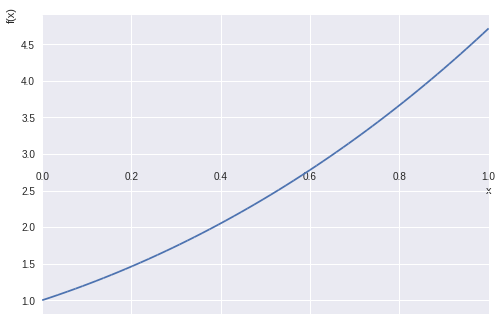

In [59]:
y=exp(x)+x**2+x
plot(y,(x,0,1))


Si la ecuación diferencial es de tipo no-lineal, entonces el método simbólico no puede llegar a una solución analítica exacta.

La función taylor3 requiere enviar como parámetros f(x,y) y f’(x,y). La derivada de f debe obtenerse previamente y debe ser enviada como parámetro.


Obtención de derivadas de funciones implícitas

In [0]:
import sympy as sp
x,y=sp.symbols('x,y')
def derive(f,nd):
    t=f
    for j in range(1,nd+1):
        d=sp.diff(f.subs(y,y(x)),x)
        f=d.subs(sp.Derivative(y(x),x),t).subs(y(x),y)
    return f  

Ejemplo. Sea y = y(x), obtenga la primera derivada en x de $ f(x,y) = y^2sen(y)-x^2+x+1$

In [60]:
from sympy import*
x,y=symbols('x,y')
f=y**2*sin(y)-x**2+x+1
d=derive(f,1)
print(d)
#-2*x + y**2*(-x**2 + x + y**2*sin(y) + 1)*cos(y) + 2*y*(-x**2 + x + y**2*sin(y) + 1)*sin(y) + 1

-2*x + y**2*(-x**2 + x + y**2*sin(y) + 1)*cos(y) + 2*y*(-x**2 + x + y**2*sin(y) + 1)*sin(y) + 1


Evaluación de la derivada

Ejemplo. Evaluar la derivada obtenida anteriormente. Use x = 1.5, y = 2.3


In [63]:
r=d.subs(x,1.5).subs(y,2.3)#	Sustitución de variables
print(r) 
#-2.39580345631014
r.evalf(6)	#Función para mostrar
#-2.39580	una cantidad fija de dígitos

-2.39580345631014


-2.39580

Método general para resolver una E.D.O con la serie  de Taylor

In [0]:
import numpy as np
import sympy as sp
x,y=sp.symbols('x,y')
def taylorg(f,a,b,h,m,k):
    u=np.zeros([m,2])
    D=[ ]
    for j in range(1,k+1):
        D=D+[derive(f,j)]	    #Vector de derivadas simbólicas
    u=[]
    v=[]
    for i in range(m):
        g=f.subs(x,a).subs(y,b)
        t=b+h*g
        for j in range(1,k+1):
            z=D[j-1].subs(x,a).subs(y,b)
            t=float(t+h**(j+1)/sp.factorial(j+1)*z) #Evaluar Taylor
        b=t
        a=a+h
        u=u+[a]
        v=v+[b]
        
    return [u,v]

Ejemplo. Calcule 5 puntos de solución de la ecuación $y’ - y - x + x^2 - 1 = 0,  y(0) = 1$. 
Use el desarrollo de la serie de Taylor hasta la tercera derivada de f(x,y) = y’(x), con h = 0.1

Solución:

$f(x, y) = y’(x) = y - x^2 + x + 1$

Con la función taylorg:



In [66]:
from sympy import*
x,y=symbols('x,y')
f=y+x-x**2+1
[u,v]=taylorg(f,0,1,0.1,5,3)
u
#[0.1, 0.2, 0.3, 0.4, 0.5]
v
#[1.215170, 1.461402, 1.739858, 2.051824, 2.398720]

[1.215170833333333,
 1.4614025708506944,
 1.7398584970625377,
 2.051824240080686,
 2.398720638596838]

Fórmula de Euler

In [0]:
import numpy as np
def euler(f,x,y,h,m):
    u=[]
    v=[]
    u=np.zeros([m,2])
    for i in range(m):
        y=y+h*f(x,y)
        x=x+h
        u=u+[x]
        v=v+[y]
    return [u,v]


Ejemplo. Calcule 20 puntos de la solución de la ecuación $y’ - y - x + x^2 - 1 = 0, y(0) = 1$
espaciados en una distancia h = 0.1, usando la función euler. Grafique y compare con la solución analítica.

Solución:  $f(x, y) = y - x^2 + x + 1,  x_0 = 0, y_0 = 1, h = 0.1,m = 20 $ (cantidad de puntos)


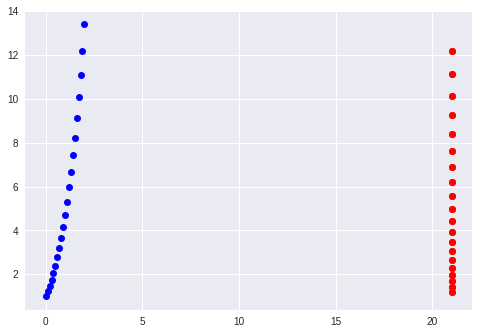

In [68]:
from pylab import*
def f(x,y):return y-x**2+x+1	#Ecuación diferencial
[u,v]=euler(f,0,1,0.1,20)
plot(u,v,'or')	#Gráfico de la solución con Euler
def y(x):return exp(x)+x**2+x	#Solución analítica
x=arange(0,2.1,0.1)
plot(x,y(x),'ob')	#Gráfico de la solución analítica
grid(True)
show()

Fórmula de Heun

In [0]:
import numpy as np
def heun(f,x,y,h,m):
    u=np.zeros([m,2],dtype=float)
    u=[]
    v=[]
    for i in range(m):
        k1=h*f(x,y)
        k2=h*f(x+h,y+k1)
        y=y+0.5*(k1+k2)
        x=x+h
        u=u+[x]
        v=v+[y]
    return [u,v]

Ejemplo. Calcule 20 puntos de la solución de la ecuación $ y’ - y - x + x^2 - 1 = 0, y(0) = 1$
espaciados en una distancia h = 0.1, usando la función Heun Grafique y compare con la solución analítica.
Solución :

$f(x, y) = y - x^2 + x + 1 x_0 = 0, y_0 = 1$,
h = 0.1,
m = 20 (cantidad de puntos)


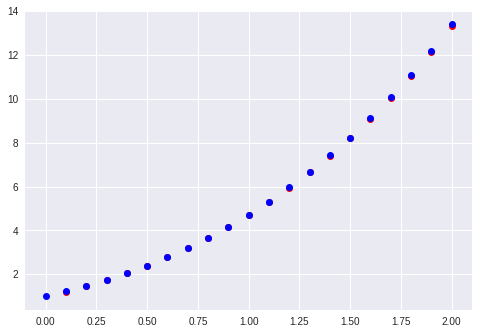

In [71]:
from pylab import*

def f(x,y):return y-x**2+x+1	#Ecuación diferencial
[u,v]=heun(f,0,1,0.1,20)
plot(u,v,'or')	#Gráfico de la solución con Heun
def y(x):return exp(x)+x**2+x	#Solución analítica
x=arange(0,2.1,0.1)
plot(x,y(x),'ob')	#Gráfico de la solución analítica
grid(True)
show()

La diferencia en el gráfico no es significativa

Fórmula de Runge-Kutta.

In [0]:
import numpy as np
def rungekutta(f,x,y,h,m):
    u=np.zeros([m,2],dtype=float)
    u=[]
    v=[]
    for i in range(m):
        k1=h*f(x,y)
        k2=h*f(x+h/2,y+k1/2)
        k3=h*f(x+h/2,y+k2/2)
        k4=h*f(x+h,y+k3)
        y=y+1/6*(k1+2*k2+2*k3+k4)
        x=x+h
        u=u+[x]
        v=v+[y]
    return [u,v]

Calculo 20 puntos de la solución de la ecuación $y’ - y - x + x^2 - 1 = 0, y(0) = 1$
espaciados en una distancia h=1, usando el método de Runge-Kutta.

Solución
$y’ = f(x, y) = x - x^2 + y + 1, x_0 = 0, y_0 = 1, h = 0.1$



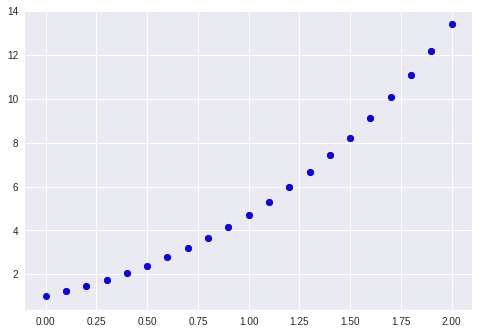

In [74]:
from pylab import*
def f(x,y):return y-x**2+x+1	#Ecuación diferencial
[u,v]=rungekutta(f,0,1,0.1,20)
plot(u,v,'or')	#Gráfico de la solución con R-K
def y(x):return exp(x)+x**2+x	#Solución analítica
x=arange(0,2.1,0.1)
plot(x,y(x),'ob')	#Gráfico de la solución analítica
grid(True)
show()

Puntos de la solución analítica y numérica con la fórmula de Heun Los gráficos de las dos soluciones coinciden.
Para verificar la alta precisión, se calcula la diferencia entre la solución numérica y analítica cuando x=1

v[9]	La celda v[9] corresponde a y(1)
4.718276340387802
y(1)	Solución analítica
4.7182818284590446
v[9]-y(1)	Diferencia
-5.4880712427873846e-06


Fórmula de Runge-Kutta de segundo orden

In [0]:
import numpy as np
def rk4(f,x,y,h,m):
    u=np.zeros([m,2],dtype=float)
    for i in range(m):
        k1=h*f(x,y)
        k2=h*f(x+h/2,y+k1/2)
        k3=h*f(x+h/2,y+k2/2)
        k4=h*f(x+h,y+k3)
        y=y+1/6*(k1+2*k2+2*k3+k4)
        x=x+h
        u[i,0]=x
        u[i,1]=y
    return u



 Fórmula de Runge-Kutta de segundo orden para resolver sistemas de E. D. O. de primer orden

In [0]:
#Runge-Kutta de segundo orden para n EDO-condiciones en el inicio
import sympy as sp
import numpy as np
def rk2n(F,V,U,h,m):
    nF=len(F)
    nV=len(V)
    K1=np.zeros([nF],dtype=sp.Symbol)
    K2=np.zeros([nF],dtype=sp.Symbol)
    rs=np.zeros([m,nV],dtype=float)
    T=list(np.copy(U))
    
    for p in range(m):
        for i in range(nF):
            K1[i]=F[i]
            K2[i]=F[i]
        for i in range(nF):
            for j in range(nV):
                K1[i]=K1[i].subs(V[j],float(T[j]))
            K1[i]=h*K1[i]
        for i in range(nF):
            K2[i]=K2[i].subs(V[0],float(T[0])+h)
            for j in range(1,nV):
                K2[i]=K2[i].subs(V[j],float(T[j])+K1[j-1])
            K2[i]=h*K2[i]

        T[0]=T[0]+h
        rs[p,0]=T[0]
        for i in range(nF):
            T[i+1]=T[i+1]+0.5*(K1[i]+K2[i])
            rs[p,i+1]=T[i+1]
    return rs

Fórmula de Runge-Kutta de cuarto orden para resolver sistemas de E. D. O. de primer orden


In [0]:
#Runge Kutta de cuarto orden para n EDO's
import sympy as sp
import numpy as np
def rk4n(F,V,U,h,m):
    nF=len(F)
    nV=len(V)
    K1=np.zeros([nF],dtype=sp.Symbol)
    K2=np.zeros([nF],dtype=sp.Symbol)
    K3=np.zeros([nF],dtype=sp.Symbol)
    K4=np.zeros([nF],dtype=sp.Symbol)
    rs=np.zeros([m,nV],dtype=float)
    T=list(np.copy(U))

    for p in range(m):
        for i in range(nF):
            K1[i]=F[i]
            K2[i]=F[i]
            K3[i]=F[i]
            K4[i]=F[i]
        for i in range(nF):
            for j in range(nV):
                K1[i]=K1[i].subs(V[j],float(T[j]))
            K1[i]=h*K1[i]
        for i in range(nF):
            K2[i]=K2[i].subs(V[0],float(T[0])+h/2)
            for j in range(1,nV):
                K2[i]=K2[i].subs(V[j],float(T[j])+K1[j-1]/2)
            K2[i]=h*K2[i]
        for i in range(nF):
            K3[i]=K3[i].subs(V[0],float(T[0])+h/2)
            for j in range(1,nV):
                K3[i]=K3[i].subs(V[j],float(T[j])+K2[j-1]/2)
            K3[i]=h*K3[i]
        for i in range(nF):
            K4[i]=K4[i].subs(V[0],float(T[0])+h)
            for j in range(1,nV):
                K4[i]=K4[i].subs(V[j],float(T[j])+K3[j-1])
            K4[i]=h*K4[i]
        T[0]=T[0]+h
        rs[p,0]=T[0]
        for i in range(nF):
            T[i+1]=T[i+1]+1/6*(K1[i]+2*K2[i]+2*K3[i]+K4[i])
            rs[p,i+1]=T[i+1]
    return rs



Ejemplos de ODE.


Ejemplo. Con la fórmula de Heun obtenga 20 puntos de la solución del siguiente sistema de ecuaciones diferenciales. Use h = 0.1 Representelo graficamente y compare con la solución numérica de Python.
$y’ – x – y – z = 0, y(0) = 1, z’ + x – y + z = 0, z(0) = 2$

Solución
$y’ = f(x, y, z) = x + y + z, x_0 = 0, y_0 = 1 z’ = g(x, y, z) = -x + y - z, x_0 = 0, z_0 = 2$

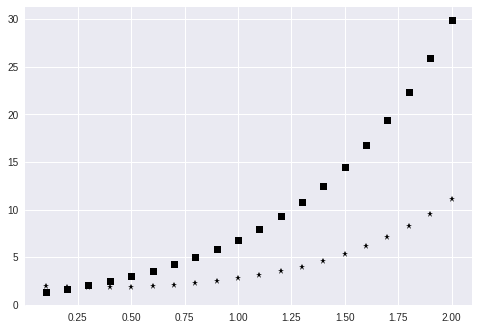

In [91]:
from pylab import*

def heun2(f,g,x,y,z,h,m):
        u=[]
        v=[]
        w=[]
        for i in range(m):
            k1y=h*f(x,y,z)
            k1z=h*g(x,y,z) 
            k2y=h*f(x+h,y+k1y,z+k1z)
            k2z=h*g(x+h,y+k1y,z+k1z)
            y=y+0.5*(k1y+k2y)
            z=z+0.5*(k1z+k2z)
            x=x+h
            u=u+[x] 
            v=v+[y]
            w=w+[z]
        return [u,v,w]

def f(x,y,z):return x+y+z	#Ecuaciones diferenciales
def g(x,y,z):return -x+y-z
[u,v,w]=heun2(f,g,0,1,2,0.1,20)	#Puntos de la solución
plot(u,v,'sk')	#Gráfico de y(x)
plot(u,w,'*k')	#Gráfico de z(x)
grid(True)
show()

Solución numérica con el método Odeint de la librería SciPy de Python

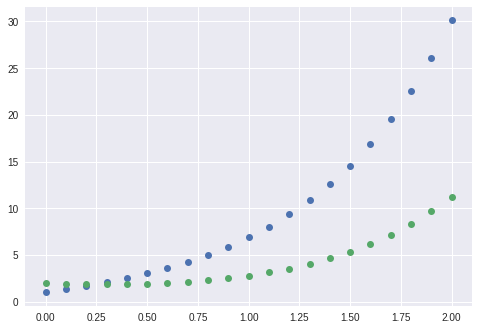

In [96]:
from numpy import*
from pylab import*
from scipy.integrate import odeint
def fun(v0,x):	#Definición del sistema de EDO
    y=v0[0] 
    z=v0[1]
    vec=[x+y+z,-x+y-z]
    return vec
x=arange(0,2.1,0.1) #	Variable independiente
v0=[1,2]
vsol=odeint(fun,v0,x)	#Vectores solución
plot(x,vsol,'o')	#Gráficos de los vectores
grid(True)
show()

 La fórmula de Runge-Kutta para dos EDO de primer orden

Una función para calcular puntos de la solución de un sistema de dos ecuaciones diferenciales ordinarias de primer orden con condiciones en el inicio con la fórmula de Runge-Kutta.

La función requiere f(x,y), g(x,y), los puntos iniciales $(x_0, y_0), (x_0, z_0)$ y los parámetros h , m
(cantidad de puntos).

La función entrega tres vectores u, v, w conteniendo los puntos de x, y(x), z(x)


In [0]:
def rungekutta2(f,g,x,y,z,h,m): 
    u=[]
    v=[]
    w=[]
    for i in range(m): 
        k1y=h*f(x,y,z) 
        k1z=h*g(x,y,z)
        k2y=h*f(x+h/2,y+k1y/2,z+k1z/2)
        k2z=h*g(x+h/2,y+k1y/2,z+k1z/2) 
        k3y=h*f(x+h/2,y+k2y/2,z+k2z/2)
        k3z=h*g(x+h/2,y+k2y/2,z+k2z/2)
        k4y=h*f(x+h,y+k3y,z+k3z) 
        k4z=h*g(x+h,y+k3y,z+k3z)
        y=y+1/6*(k1y+2*k2y+2*k3y+k4y) 
        z=z+1/6*(k1z+2*k2z+2*k3z+k4z) 
        x=x+h
        u=u+[x]
        v=v+[y]
        w=w+[z]
        return [u,v,w]

Ejemplo. Con la fórmula de Heun obtenga 20 puntos de la solución del siguiente sistema de ecuaciones diferenciales. Use h = 0.1 Grafique y compare con la solución numérica de Python.
$y’ – x – y – z = 0, y(0) = 1 z’ + x – y + z = 0, z(0) = 2$
Solución
$y’ = f(x, y, z) = x + y + z, x_0 = 0, y_0 = 1 z’ = g(x, y, z) = -x + y - z, x_0 = 0, z_0 = 2$

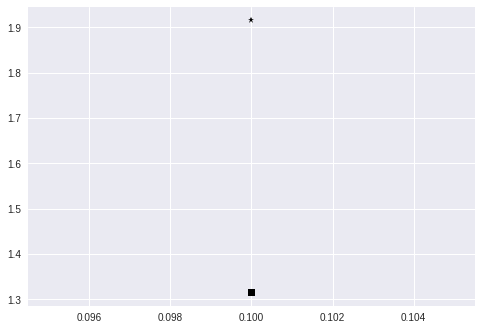

In [104]:
from pylab import*
def f(x,y,z):return x+y+z	#Ecuaciones diferenciales
def g(x,y,z):return -x+y-z
[u,v,w]=rungekutta2(f,g,0,1,2,0.1,20)	#Puntos de la solución
plot(u,v,'sk')	#Gráfico de y(x)
plot(u,w,'*k')	#Gráfico de z(x)
grid(True)
show()


Al transformar la ecuación diferencial de segundo orden a un sistema de dos ecuaciones diferenciales de primer orden se pueden usar las mismas funciones desarrolladas anteriormente. Para el ejemplo anterior se usará función rungekutta2

Solución

Mediante la sustitución z = y’ se obtiene
z’ – z – x + y + 1 = 0

Constituyen un sistema de dos ecuaciones diferenciales de primer orden que se puede escribir
y’ = f(x,y,z) = z,	y(0) = 1
z’ = g(x,y,z) = x – y + z – 1,	z(0) = 2

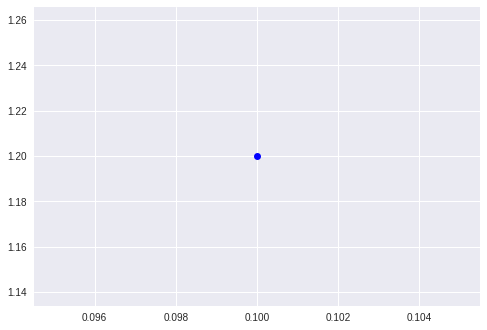

In [106]:
from pylab import*

def f(x,y,z):return z	#Ecuaciones diferenciales
def g(x,y,z):return x-y+z-1
[u,v,w]=rungekutta2(f,g,0,1,2,0.1,20)	#Puntos de la solución
plot(u,v,'ob')	#Gráfico de y(x)
grid(True)
show()

Solución numérica de la ecuación diferencial de segundo orden del ejemplo anterior transformada a dos de primer orden, con el método Odeint de la librería Scipy de Python
y’ = f(x,y,z) = z,	y(0) = 1
z’ = g(x,y,z) = x – y + z – 1,	z(0) = 2


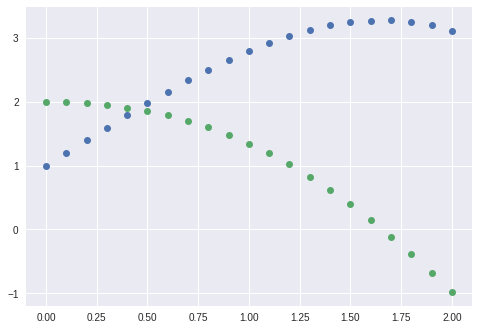

[[ 1.          2.        ]
 [ 1.19982918  1.99483344]
 [ 1.39860011  1.97866944]
 [ 1.59516358  1.95052131]
 [ 1.78827271  1.90942437]
 [ 1.97658579  1.85444871]
 [ 2.15867038  1.78471239]
 [ 2.33300885  1.69939582]
 [ 2.49800541  1.59775695]
 [ 2.65199444  1.47914716]
 [ 2.79325102  1.34302804]
 [ 2.92000253  1.1889885 ]
 [ 3.03044232  1.01676253]
 [ 3.12274519  0.82624725]
 [ 3.19508453  0.61752115]
 [ 3.24565142  0.39086235]
 [ 3.27267551  0.14676666]
 [ 3.27444761 -0.11403474]
 [ 3.24934419 -0.39055822]
 [ 3.19585332 -0.68155148]
 [ 3.11260243 -0.98547847]]


In [109]:
from numpy import*
from pylab import*
from scipy.integrate import odeint
def fun(v0,x):	#Definición del sistema de EDO
    y=v0[0]
    z=v0[1]
    vec=[z, x-y+z-1] 
    return vec
x=arange(0,2.1,0.1)	#Variable independiente x = 0, 0.1,..2.0
v0=[1,2]
vsol=odeint(fun,v0,x)	#Vectores solución
plot(x,vsol,'o')	#Gráficos de los vectores
grid(True)
show()
shape(vsol) #(21, 2)
print(vsol)

#La matriz vsol contiene dos columnas de 21 elementos. La primera es y(x)



Solución numérica de la ecuación diferencial de segundo orden del ejemplo anterior con el método dsolve de la librería simbólica SymPy de Python
y’’ – y’ – x + y + 1 = 0, y(0) = 1, y’(0) = 2

In [111]:
from sympy import*
x=Symbol('x')
y=Function('y')
dsolve(Derivative(y(x),x,x)-Derivative(y(x),x)-x+y(x)+1)
#y(x) == x + (C1*sin(sqrt(3)*x/2) + C2*cos(sqrt(3)*x/2))*sqrt(exp(x))

Eq(y(x), x + (C1*sin(sqrt(3)*x/2) + C2*cos(sqrt(3)*x/2))*sqrt(exp(x)))

Ecuaciones Diferenciales Ordinarias no lineales

Los métodos numéricos pueden aplicarse igualmente para calcular la solución aproximada de ecuaciones diferenciales ordinarias no lineales, para las cuales no es posible o pudiese ser muy laborioso obtener la solución analítica

Ejemplo. Obtenga numéricamente la solución de la ecuación
y’’ + yy’ - x + y - 3 = 0, y(0) = 1, y’(0) = 2, 0≤x≤2

Mediante la sustitución z = y’, se obtiene: z’ + yz - x + y - 3 = 0
Es un sistema de dos ecuaciones diferenciales de primer orden que se puede escribir
y’ = f(x,y,z) = z, y(0) = 1
z’ = g(x,y,z) = x - y - yz + 3,	z(0) = 2
Solución con el método runkekutta2

In [117]:
from numpy import*
from scipy.integrate import odeint
def fun(v0,x):#	Definición del sistema de EDO
    y=v0[0]
    z=v0[1]
    vec=[z, x-y-y*z+3] 
    return vec
x=arange(0,0.6,0.1) #Variable independiente
v0=[1,2]
vsol=odeint(fun,v0,x)	#Vectores solución
print(x)
#[ 0. , 0.1, 0.2, 0.3, 0.4, 0.5]
print(vsol)

[0.  0.1 0.2 0.3 0.4 0.5]
[[1.         2.        ]
 [1.19919072 1.97599116]
 [1.3937634  1.90902847]
 [1.57987764 1.80854407]
 [1.75471089 1.68521327]
 [1.91651026 1.54953843]]


Método de diferencias finitas para una EDO

In [0]:
import numpy as np
def edodif(P,Q,R,S,x0,y0,xn,yn,n):
    h=(xn-x0)/n
    a=[];b=[];c=[];d=[]
    u=np.zeros([n-1,2],float)
    for i in range(0,n-1):
        x=x0+h*i
        a=a+[P(x,h)]			#diagonales del sistema tridiagonal
        b=b+[Q(x,h)]
        c=c+[R(x,h)]
        d=d+[S(x,h)]			#constantes del sistema tridiagonal
        u[i,0]=x
    d[0]=d[0]-a[0]*y0			#corrección para la primera ecuación
    d[n-2]=d[n-2]-c[n-2]*yn		#corrección para la última ecuación
    u[:,1]=tridiagonal(a,b,c,d)
    return u




Método explícito de diferencias finitas para una E.D.P. de tipo parabólico

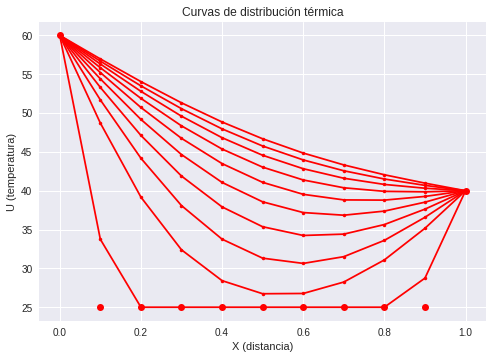

In [31]:
# Método explícito de diferencias finitas para una EDP parabólica
# U(i,j+1)=(P)U(i-1,j) + (Q)U(i,j) + (R)U(i+1,j) 

def edpdif(P,Q,R,U,m):
    u=[U[0]]
    for i in range(1,m):
        u=u+[P*U[i-1]+Q*U[i]+R*U[i+1]]	  # Cálculo de puntos
    u=u+[U[m]]
    return u
import matplotlib.pyplot as pl
m=10                     	# Número de puntos en x
n=100                    	# Número de niveles en t
Ta=60; Tb=40       		# Condiciones en los bordes
To=25                    	# Condición en el inicio
dx=0.1; dt=0.01     		# incrementos 
L=1                        	# longitud
k=4	                   	# dato especificado
U=[Ta]                   	# Asignación inicial
for i in range(1,m):
   U=U+[To]               
U=U+[Tb]
lamb=dt/(k*dx**2)			#Parámetro lambda
P=lamb
Q=1-2*lamb
R=lamb
pl.title('Curvas de distribución térmica');
pl.xlabel('X (distancia)');
pl.ylabel('U (temperatura)')
x=[0]
for i in range(1,m+1):
    x=x+[i*dx]	         	# Coordenadas para el gráfico
pl.plot(x,U,'or')    		# Distribución inicial
for j in range(n):
    U=edpdif(P,Q,R,U,m)
    if j%10==0:	
        pl.plot(x,U,'-r');   	# curvas cada 10 niveles de t
        pl.plot(x,U,'.r')    	# puntos
pl.grid(True)
pl.show()



 Método implícito para una E.D.P. de tipo    parabólico

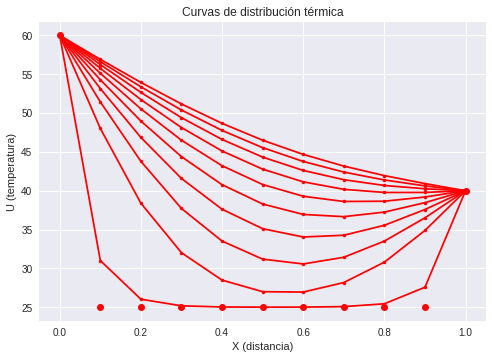

In [34]:
# Método implícito de diferencias finitas para una EDP parabólica
# (P)U(i-1,j) + (Q)U(i,j) + (R)U(i+1,j) = -U(i,j-1)
def tridiagonal(a, b, c, d):
    n=len(d)
    w=[b[0]]
    g=[d[0]/w[0]]
    for i in range(1,n):
        w=w+[b[i]-a[i]*c[i-1]/w[i-1]]
        g=g+[(d[i]-a[i]*g[i-1])/w[i]]
    x=[]
    for i in range(n):
        x=x+[0]    
    x[n-1]=g[n-1]
    for i in range(n-2,-1,-1):
        t=x[i+1]
        x[i]=g[i]-c[i]*t/w[i]
    return x

def edpdifpi(P, Q, R, U, m):
# Método de Diferencias Finitas Implícito
    a=[];b=[];c=[];d=[]
    for i in range(m-2):
        a=a+[P]
        b=b+[Q]
        c=c+[R]
        d=d+[-U[i+1]]
    d[0]=d[0]-a[0]*U[0]
    d[m-3]=d[m-3]-c[m-3]*U[m-1]
    u=tridiagonal(a,b,c,d)
    U=[U[0]]+u+[U[m-1]]
    return U
import matplotlib.pyplot as pl
# import pylab as pl
m=11                     	# Número ecuaciones: m-1
n=100                    	# Número de niveles en t
Ta=60; Tb=40       		# Condiciones en los bordes
To=25                    	# Condición en el inicio
dx=0.1; dt=0.01     		# incrementos 
L=1                        	# longitud
k=4	                   	# dato especificado
U=[Ta]                   	# Asignación inicial
for i in range(1,m-1):
   U=U+[To]               
U=U+[Tb]
lamb=dt/(k*dx**2)
P=lamb
Q=-1-2*lamb
R=lamb
pl.title('Curvas de distribución térmica');
pl.xlabel('X (distancia)');
pl.ylabel('U (temperatura)')
x=[]
for i in range(m):
    x=x+[i*dx]	         	# Coordenadas para el gráfico
pl.plot(x,U,'or')    		# Distribución inicial
for j in range(n):
    U=edpdifpi(P,Q,R,U,m)
    if j%10==0:
        pl.plot(x,U,'-r');   	# curvas cada 5 niveles de t
        pl.plot(x,U,'.r')    
pl.grid(True)
pl.show()

Una E.D.P. con derivadas en los bordes

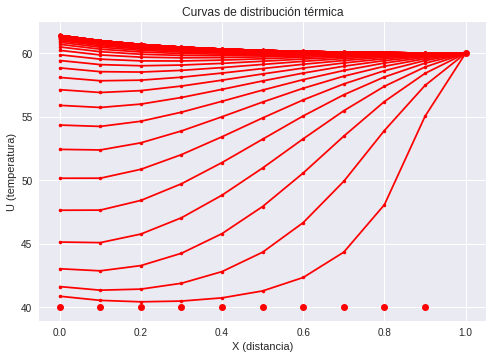

In [39]:
# Solución de una EDP con una derivada en un borde
def edpdifpid(P,Q,R,U,der0,dx,m):
# Método de Diferencias Finitas Implícito
    a=[];b=[];c=[];d=[]
    for i in range(m-1):
        a=a+[P]
        b=b+[Q]
        c=c+[R]
        d=d+[-U[i+1]]
    c[0]=P+R;
    d[0]=d[0]+2*dx*P*der0
    d[m-2]=d[m-2]-c[m-2]*U[m-1]
    u=tridiagonal(a,b,c,d)
    U=u+[U[m-1]]
    return U
import matplotlib.pyplot as pl

m=11                     	# Número ecuaciones: m-1
n=50                    		# Número de niveles en t
der0=-5                       	# Derivada en el borde izquierdo
Tb=60       		        	# Condiciones en los bordes
To=40                    	# Condición en el inicio
dx=0.1					# incrementos
dt=0.1     		 
L=1                        	# longitud
k=4	                   	# dato especificado
U=[]                    		# Asignación inicial
for i in range(m-1):
   U=U+[To]               
U=U+[Tb]
lamb=dt/(k*dx**2)
P=lamb
Q=-1-2*lamb
R=lamb
pl.title('Curvas de distribución térmica');
pl.xlabel('X (distancia)');
pl.ylabel('U (temperatura)')
x=[]
for i in range(m):
    x=x+[i*dx]	         		# Coordenadas para el gráfico
pl.plot(x,U,'or')    				# Distribución inicial
for j in range(n):
    U=edpdifpid(P,Q,R,U,der0,dx,m)
    pl.plot(x,U,'-r');   	      	# curvas cada 5 niveles de t
    pl.plot(x,U,'.r')    
pl.grid(True)
pl.show()

Una E.D.P. de tipo elíptico

[60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0]
[50.0, 55.06, 57.11, 58.15, 58.82, 59.36, 59.88, 60.48, 61.26, 62.47, 64.73, 70.0]
[50.0, 53.15, 55.29, 56.75, 57.86, 58.81, 59.77, 60.85, 62.17, 63.93, 66.44, 70.0]
[50.0, 52.31, 54.26, 55.83, 57.17, 58.42, 59.68, 61.08, 62.71, 64.7, 67.14, 70.0]
[50.0, 51.93, 53.71, 55.3, 56.76, 58.17, 59.63, 61.21, 63.01, 65.08, 67.44, 70.0]
[50.0, 51.78, 53.48, 55.08, 56.59, 58.07, 59.62, 61.29, 63.16, 65.25, 67.56, 70.0]
[50.0, 51.79, 53.51, 55.11, 56.63, 58.12, 59.66, 61.33, 63.19, 65.27, 67.57, 70.0]
[50.0, 51.97, 53.78, 55.4, 56.87, 58.29, 59.74, 61.32, 63.1, 65.14, 67.47, 70.0]
[50.0, 52.37, 54.35, 55.97, 57.33, 58.58, 59.85, 61.22, 62.83, 64.78, 67.18, 70.0]
[50.0, 53.2, 55.39, 56.89, 58.01, 58.98, 59.94, 60.99, 62.29, 64.01, 66.49, 70.0]
[50.0, 55.09, 57.18, 58.24, 58.92, 59.47, 59.99, 60.58, 61.34, 62.53, 64.75, 70.0]
[60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0]
Conteo de iteraciones:  41


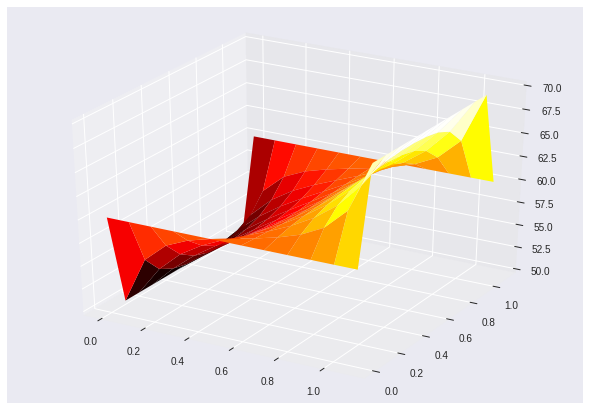

In [44]:
# Programa para resolver una EDP Elíptica
# con condiciones constantes en los bordes
from numpy import*
Ta=60;Tb=60;Tc=50;Td=70    #Bordes izquierdo, derecho, abajo, arriba
n=10                       #Puntos interiores en dirección hor. (X)
m=10                       #Puntos interiores en dirección vert.(Y)
miter=100                  #Máximo de iteraciones
e=0.001                    #Error de truncamiento relativo 0.1%
u=zeros([n+2,m+2],float)
for i in range(n+2):
    u[i,0]=Tc
    u[i,m+1]=Td
for j in range(m+2):
    u[0,j]=Ta
    u[n+1,j]=Tb
p=0.25*(Ta+Tb+Tc+Td)       	# valor inicial interior promedio
for i in range(1,n-1):
    for j in range(1,m-1):
        u[i,j]=p
k=0					 # conteo de iteraciones
converge=False			 # señal de convergencia
while k<miter and not converge:
      k=k+1
      t=u.copy()
      for i in range(1,n+1):
          for j in range(1,m+1):
              u[i,j]=0.25*(u[i-1,j]+u[i+1,j]+u[i,j+1]+u[i,j-1])
      if linalg.norm((u-t),inf)/linalg.norm(u,inf)<e:
          converge=True
if converge:
    for i in range(n+2):		       # Malla con la solución final
        print([float('%5.2f' % (u[i,j])) for j in range(m+2)])
                      
    print('Conteo de iteraciones: ',k)    # Conteo de iteraciones 

    import matplotlib.pyplot as pl           
    from mpl_toolkits.mplot3d import Axes3D      # Gráfico 3D
    fig=pl.figure()
    ax=Axes3D(fig)
    x=arange(0,1.2,0.1)
    y=arange(0,1.2,0.1)
    X,Y=meshgrid(x,y)
    ax.plot_surface(X,Y,u,rstride=1,cstride=1,cmap='hot')
    pl.show()
else:
    print('No converge')



Una E.D.P. de tipo hiperbólico

   1 [0.0, -0.05, -0.1, -0.15, -0.15, -0.15, -0.15, -0.15, -0.1, -0.05, 0.0]
   2 [0.0, -0.05, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.05, 0.0]
   3 [0.0, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, 0.0]
   4 [0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
   5 [0.0, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0]
   6 [0.0, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.0]
   7 [0.0, 0.05, 0.1, 0.15, 0.15, 0.15, 0.15, 0.15, 0.1, 0.05, 0.0]
   8 [0.0, 0.05, 0.1, 0.15, 0.2, 0.2, 0.2, 0.15, 0.1, 0.05, 0.0]
   9 [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.2, 0.15, 0.1, 0.05, 0.0]
  10 [0.0, 0.05, 0.1, 0.15, 0.2, 0.2, 0.2, 0.15, 0.1, 0.05, 0.0]


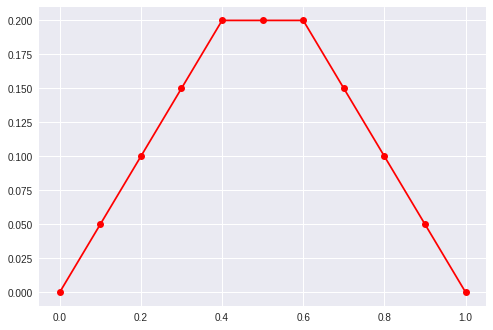

In [45]:
# Método de Diferencias Finitas explícito: EDP Hiperbólica

from numpy import*
import pylab as pl 
m=11                               # Número de puntos en x
n=10                               # Número de niveles en t
c=2                                # dato especificado
L=1                                # longitud
dx=L/(m-1)                         # incremento
dt=sqrt(dx**2/c**2)       	      # para cumplir la condición 
U0=zeros([m])                      # Extremos fijos

x=0
for i in range(1,m-1):         # Nivel inicial
    x=x+dx
    if x<L/2:				
        U0[i]=-0.5*x		 # Expresión para el desplazamiento
    else:
        U0[i]= 0.5*(x-1)

U1=[U0[0]]            	           # Primer nivel
for i in range (1,m-1):
   U1=U1 + [0.5*(U0[i-1]+U0[i+1])]
U1=U1+[U0[m-1]]                    

for j in range(1,n+1):            # Siguientes niveles
    Uj=[U1[0]]
    for i in range(1,m-1):
         Uj=Uj + [U1[i+1]+U1[i-1]-U0[i]]
    Uj=Uj + [U1[m-1]]
    U0=U1                         # Actualizar niveles anteriores
    U1=Uj
    
    # Mostrar la solución en cada nivel 
    print('%4d'%j,[float('%5.2f' % (Uj[j])) for j in range(m)])

# Mostrar el gráfico de la solución en el último nivel 
x=[]
for i in range(m):
    x=x+[i*dx]	         	     # Coordenadas para el gráfico

pl.grid(True)
pl.plot(x,Uj,'or')		     # Graficar puntos y cuerda
pl.plot(x,Uj,'-r')
pl.show()

Animación para una E.D.P. de tipo  Hiperbólico

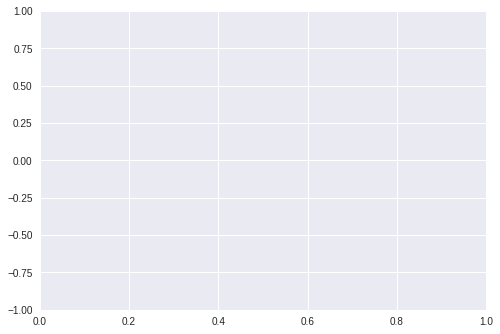

In [47]:
# Método de Diferencias Finitas explícito: EDP Hiperbólica
# Programa para animación de la figura
global m,c,L,dx,dt
m=51                               # Número de puntos en x
c=2                                # dato especificado
L=1                                # longitud
dx=L/(m-1)                         # incremento
dt=(dx**2/c**2)**0.5       	       # para cumplir la condición

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

def posicion_inicial():
    global U0,U1
    U0=np.zeros([m])                      # Extremos fijos
    x=0
    for i in range(1,m-1):                # Nivel inicial
        x=x+dx
        if x<L/2:				
            U0[i]=-0.5*x		  # Expresión para el desplazamiento
        else:
            U0[i]= 0.5*(x-1)
    U1=[U0[0]]            	           # Primer nivel
    for i in range (1,m-1):
       U1=U1 + [0.5*(U0[i-1]+U0[i+1])]
    U1=U1+[U0[m-1]]

# Definir la figura, ejes, y elemento que se va a animar
fig = plt.figure()
ax = plt.axes(xlim=(0,1), ylim=(-1,1))
linea, = ax.plot([], [], lw=2)

# Iniciar la función de animación
def inicio():
    linea.set_data([], [])
    return linea,

# Función con los datos de animación. Es llamada secuencialmente
def animar(j):
    global U0,U1
    Uj=[U1[0]]
    for i in range(1,m-1):
        Uj=Uj + [U1[i+1]+U1[i-1]-U0[i]]  # Posición actual de la cuerda
    Uj=Uj + [U1[m-1]]
    U0=U1                               # Actualizar niveles anteriores
    U1=Uj
    x=np.arange(0,1+dx,dx)
    y=Uj                                 # Coordenadas para el gráfico
    linea.set_data(x, y)
    return linea,

posicion_inicial()

# Animación. blit=True para redibujar solo las partes que han cambiado

anim = animation.FuncAnimation(fig, animar, init_func=inicio,
frames=100, interval=20, blit=True)
plt.show()
